# Estimación Inicios de Campaña 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import re
from dateutil.parser import parse
import string
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import missingno as msno
from plotly.subplots import make_subplots
sns.set_style("darkgrid")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# read
tags=pd.read_excel("../../data/meta data/tags relevantes.xlsx")
tags_cc=tags.tag.to_list()
dic={}
for i,j in zip(tags.tag,tags.description):
    dic[i]=j

**Data Loading**

In [4]:
# Se lee csv
df=pd.read_csv('../../data/consolidated data/cleaned_15December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')
df.sort_index(inplace=True)
df.rename(columns=dic,inplace=True)
df.head()

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,NaN
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,NaN
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,NaN
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,62.811786
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,62.749109


In [6]:
campañas=pd.read_csv("../../data/meta data/campaign_17December2022.csv")
campañas["Fechas"]=campañas["Fechas"]+' 00:00:00'
campañas.Fechas=pd.to_datetime(campañas.Fechas)
campañas

,anio,mes,dia,Fechas,CC referencial
0,2018,4,28,2018-04-28,775
1,2018,10,28,2018-10-28,775
2,2019,4,16,2019-04-16,775
3,2019,10,11,2019-10-11,775
4,2020,5,3,2020-05-03,775
5,2021,1,16,2021-01-16,775
6,2021,7,11,2021-07-11,775
7,2022,1,27,2022-01-27,775


In [9]:
# Suavizamiento de la curva
df_smooth=pd.DataFrame(df['charge cell'].rolling(window="3d").apply(np.nanmean))

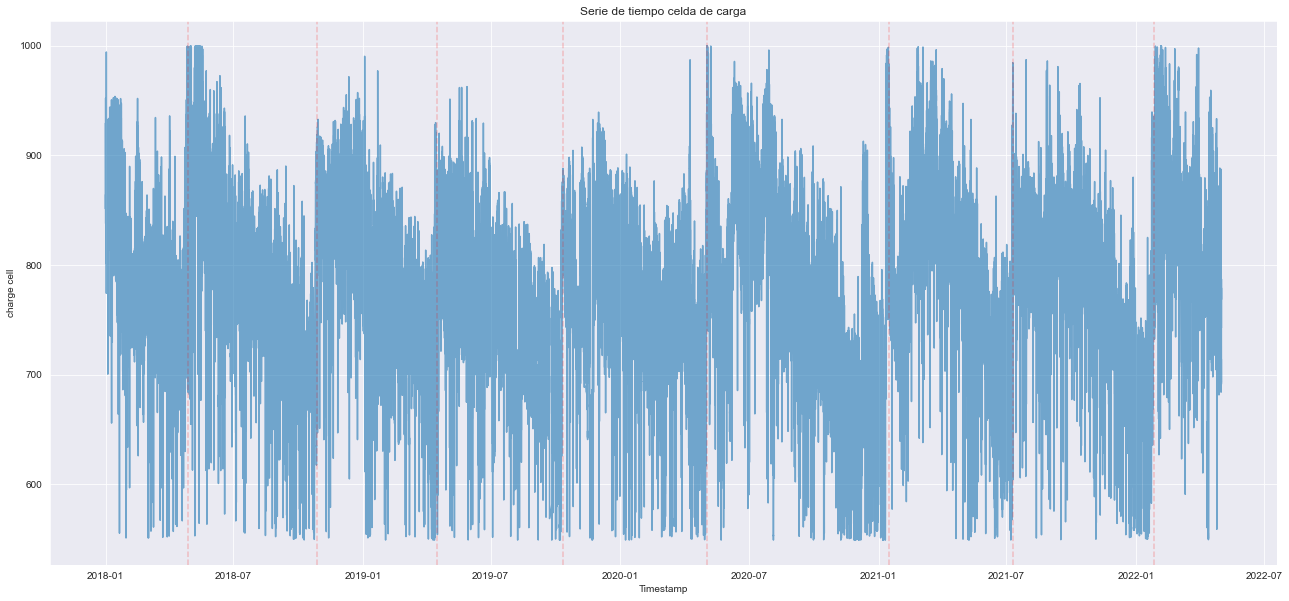

In [7]:
plt.figure(figsize=[22,10])
fig=sns.lineplot(x=df.index, y=df['charge cell'], alpha=0.6)
#sns.scatterplot(x=campañas.Fechas, y=campañas["CC referencial"])
for i in campañas.Fechas:
    plt.axvline(x = i, color = 'r', label = 'Inicios de campaña',linestyle='dashed',alpha=0.2)
plt.title("Serie de tiempo celda de carga")
#fig.set_xticklabels('')
plt.show()

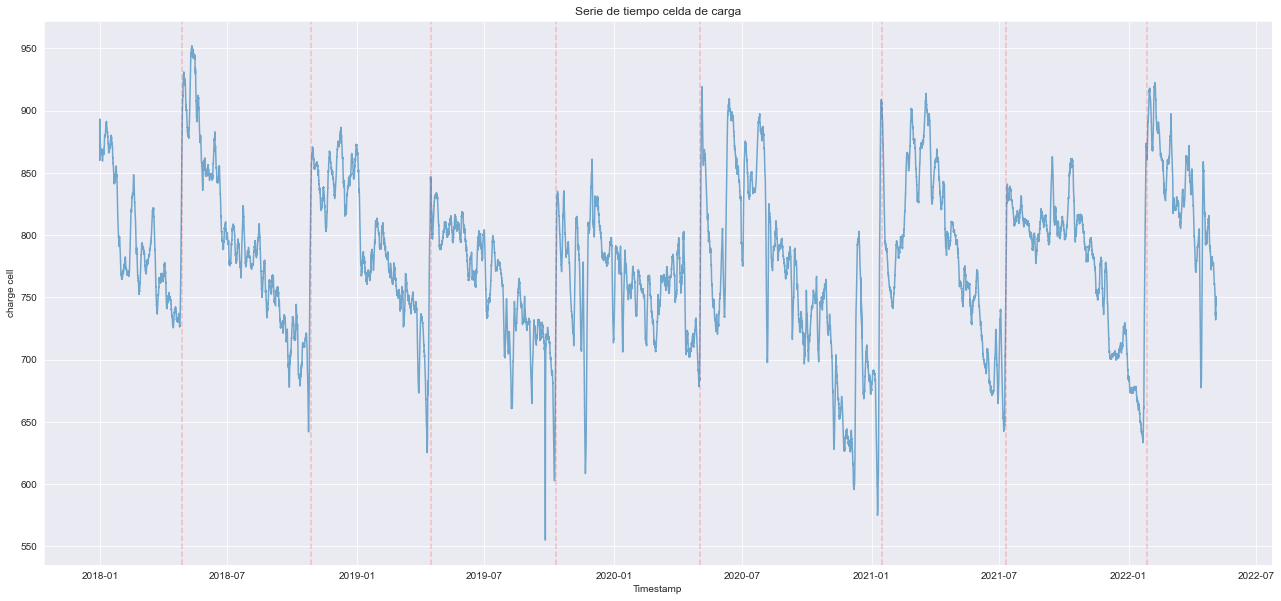

In [10]:
plt.figure(figsize=[22,10])
fig=sns.lineplot(x=df_smooth.index, y=df_smooth['charge cell'], alpha=0.6)
#sns.scatterplot(x=campañas.Fechas, y=campañas["CC referencial"])
for i in campañas.Fechas:
    plt.axvline(x = i, color = 'r', label = 'Inicios de campaña',linestyle='dashed',alpha=0.2)
plt.title("Serie de tiempo celda de carga")
#fig.set_xticklabels('')
plt.show()

In [7]:
# Detección cambio de liners
def change_liners(df):

    # Suavizamiento de la curva
    smooth=pd.DataFrame(df['charge cell'].rolling(window="3d").apply(np.nanmean))
    
    # Filtro de pesos anomalos
    smooth['charge cell']=smooth['charge cell'][smooth['charge cell']>650]
    
    # Delta CC en 5 días
    smooth["change"]=(smooth['charge cell']-smooth['charge cell'].shift(60*24*5)) 
    
    # Se debe filtrar por diferencias significativas mayores a 170 
    smooth=smooth[smooth["change"]>170]
    
    if len(smooth)>0:
        # Se define df auxiliar 1
        u=pd.DataFrame()
        u["Delta CC"]=smooth["change"]

        u.reset_index(drop=False,inplace=True)
        u["anio"]=u["Timestamp"].dt.year
        u["mes"]=u["Timestamp"].dt.month
        u["dia"]=u["Timestamp"].dt.day

        # Extracción fechas
        x=u.groupby(["anio","mes"]).min("dia") # Primer dia de detección

        # Estructura de fechas
        previo=x.index.tolist()
        anio=[]
        mes=[]
        for i in previo:
            anio.append(i[0])
            mes.append(i[1])

        # df auxiliar 2
        campana=pd.DataFrame()
        campana["anio"]=anio
        campana["mes"]=mes
        campana["dia"]=x["dia"].tolist()

        # Df que contiene fechas de inicio de campañas
        campana["Fechas"]=campana["anio"].apply(str)+"-"+campana["mes"].apply(str)+"-"+campana["dia"].apply(str)
        
        return campana
    
    else:

        return pd.DataFrame()

In [8]:
campaña=change_liners(df)
campaña["CC referencial"]=775
campaña 

,anio,mes,dia,Fechas,CC referencial
0,2018,4,28,2018-4-28,775
1,2018,10,28,2018-10-28,775
2,2019,4,16,2019-4-16,775
3,2019,10,11,2019-10-11,775
4,2020,5,3,2020-5-3,775
5,2021,1,16,2021-1-16,775
6,2021,7,11,2021-7-11,775
7,2022,1,27,2022-1-27,775


In [9]:
# Df que contiene fechas de inicio de campañas
campaña["Fechas"]=campaña["anio"].apply(str)+"-"+campaña["mes"].apply(str)+"-"+campaña["dia"].apply(str)+" 00:00:00"
campaña["Fechas"]=pd.to_datetime(campaña["Fechas"])
campaña["CC referencial"]=775
campaña

,anio,mes,dia,Fechas,CC referencial
0,2018,4,28,2018-04-28,775
1,2018,10,28,2018-10-28,775
2,2019,4,16,2019-04-16,775
3,2019,10,11,2019-10-11,775
4,2020,5,3,2020-05-03,775
5,2021,1,16,2021-01-16,775
6,2021,7,11,2021-07-11,775
7,2022,1,27,2022-01-27,775


In [11]:
# Generación inicios de campaña
campaña.to_csv('../../data/meta data/campaign_'+pd.to_datetime('today').strftime('%d%B%Y')+'.csv', index=False)

In [ ]:
fig = go.Figure(data=go.Scattergl(
    x =df_smooth.index,
    y = df_smooth["charge cell"],
    mode='lines',
    name="Celda de carga"

))

fig.add_trace(go.Scattergl(x=campaña["Fechas"], y=campaña["CC referencial"],
                    mode='markers',
                    name="Inicio campaña",line_color='#06D79F',marker=dict(color='#26E6E6',size=10,line=dict(color='red',
                                                                                                           width=0.5))))

fig.update_layout(
    title="Celda de Carga e Inicios de Campaña",
    xaxis_title="Tiempo",
    yaxis_title="Celda de Carga",
height=500, width=1200
) 
fig.show()